Point class: 1
Target class: 0


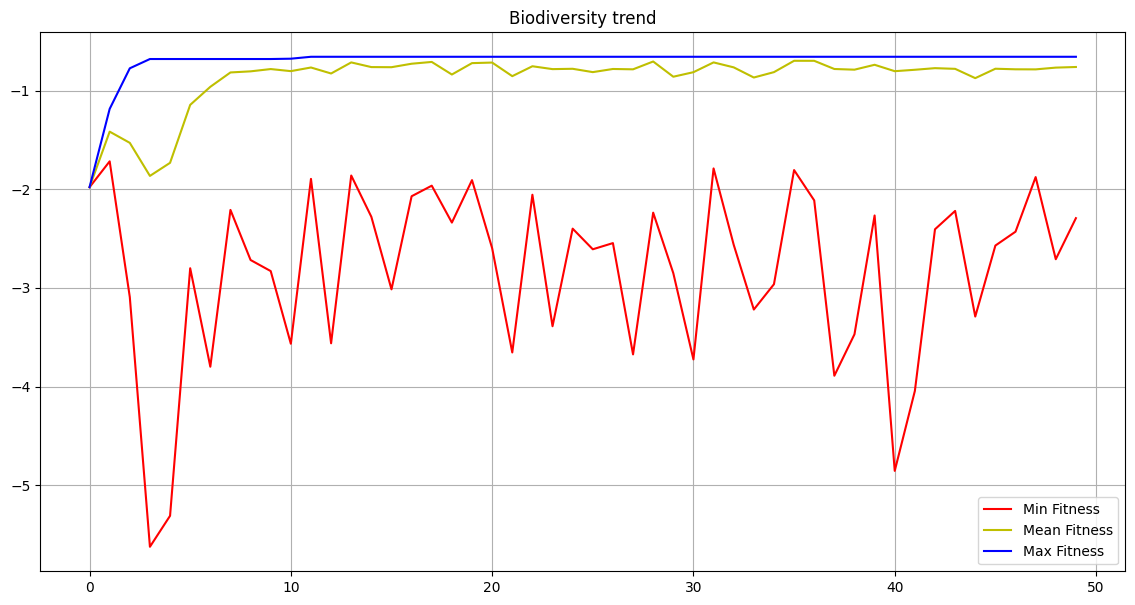

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

fp = open("synthetic.json", "r")
data = json.load(fp)
fp.close()

p1 = data[0]
c = p1["class"]
target = p1["target"]

print(f"Point class: {c}")
print(f"Target class: {target}")

diversity = p1["stats"]["diversity"]
min = np.array(p1["stats"]["min"])
mean = np.array(p1["stats"]["mean"])
max = np.array(p1["stats"]["max"])

plt.figure(figsize=(14, 7))
plt.title("Biodiversity trend")
# plt.plot([i for i in range(len(diversity))], diversity, c="g", label="Bio-Diversity")
plt.plot([i for i in range(len(min))], min, c="r", label="Min Fitness")
plt.plot([i for i in range(len(mean))], mean, c="y", label="Mean Fitness")
plt.plot([i for i in range(len(max))], max, c="b", label="Max Fitness")

plt.legend()
plt.grid()
plt.show()

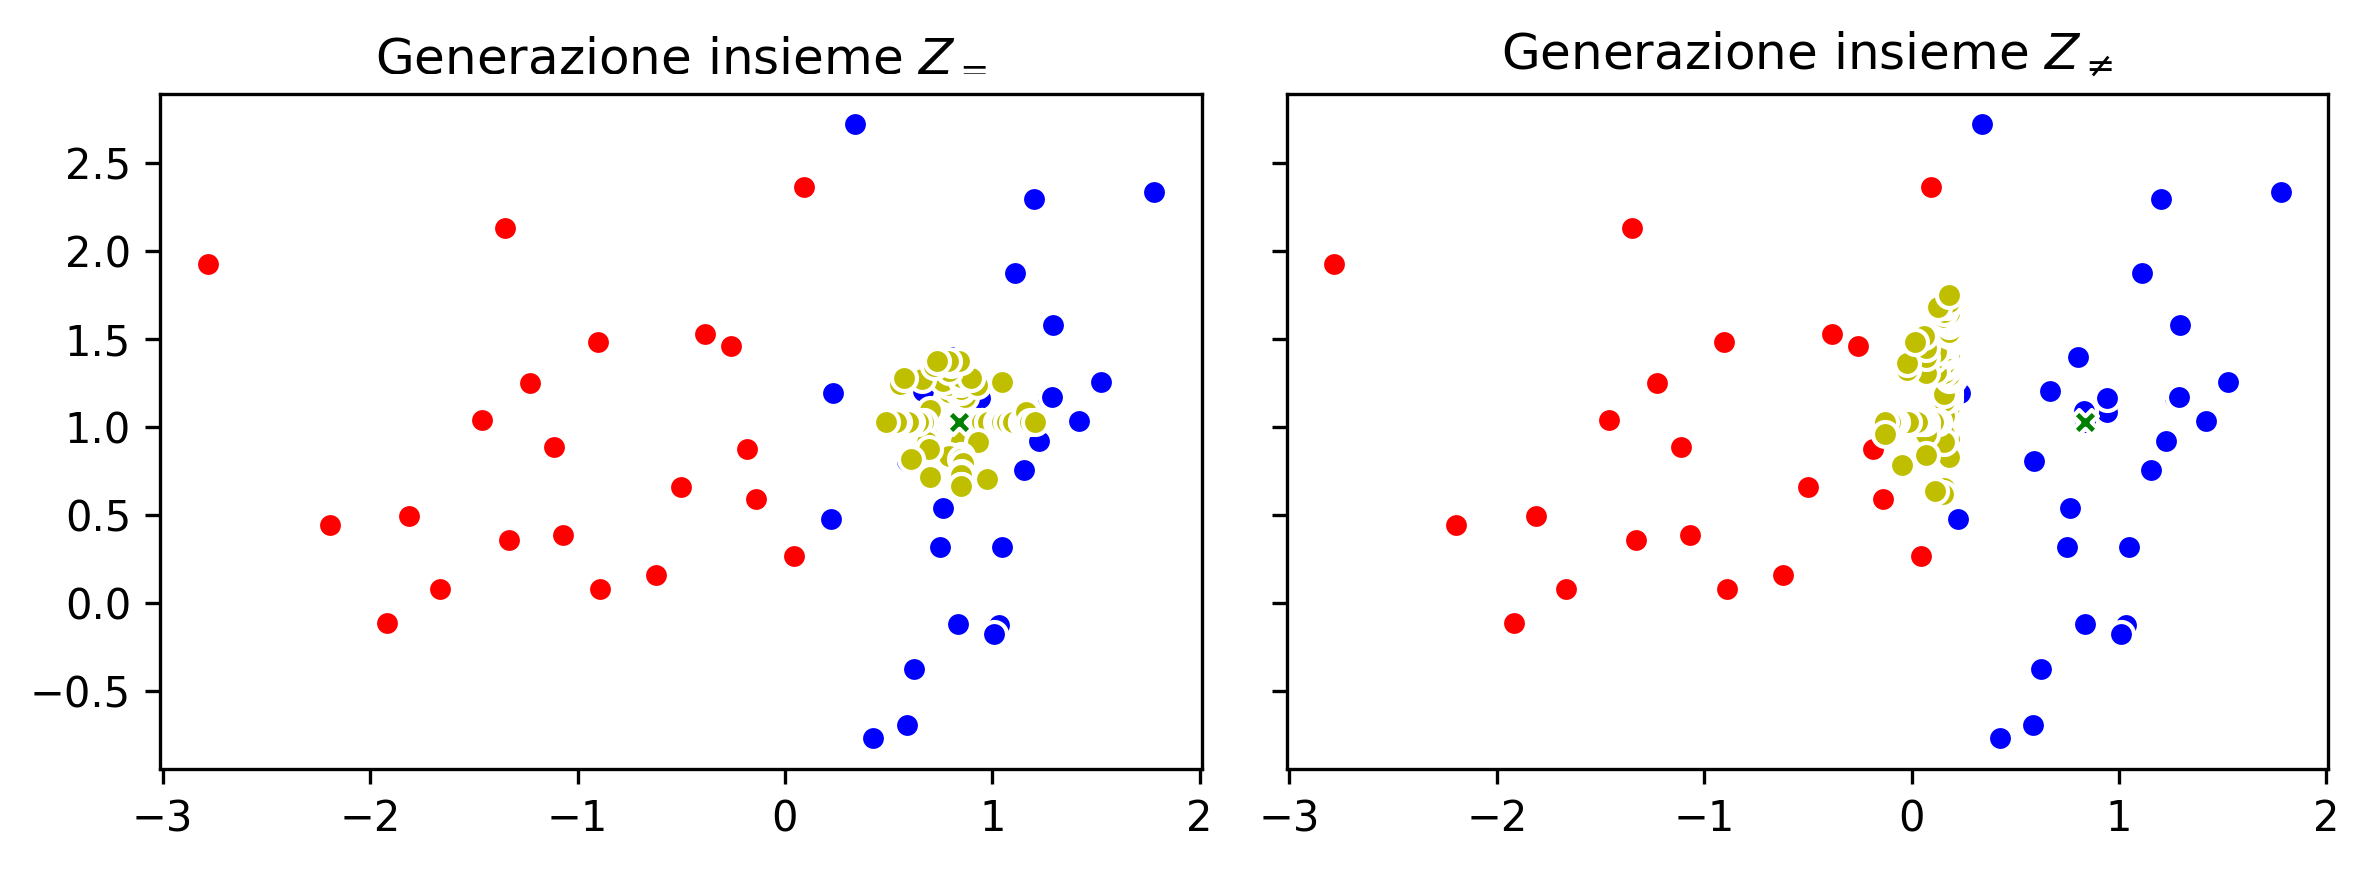

In [5]:
import json


same = {"point": [], "class": [], "target": [], "neighborhood": []}
diff = {"point": [], "class": [], "target": [], "neighborhood": []}
with open("synthetic.json", "r") as fp:
    data = json.load(fp)

    for res in data:
        if res["class"] == res["target"]:
            same["point"].append(res["point"])
            same["class"].append(res["class"])
            same["target"].append(res["target"])
            same["neighborhood"].append(res["neighborhood"])
        else:
            diff["point"].append(res["point"])
            diff["class"].append(res["class"])
            diff["target"].append(res["target"])
            diff["neighborhood"].append(res["neighborhood"])

same["point"] = np.array(same["point"])
same["class"] = np.array(same["class"])
same["target"] = np.array(same["target"])

diff["point"] = np.array(diff["point"])
diff["diff"] = np.array(diff["class"])
diff["target"] = np.array(diff["target"])

mask = same["class"] == 0
reds = same["point"][mask]
blues = same["point"][~mask]

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True, dpi=300)
for i, ax in enumerate(axes):
    if i == 0:
        ax.set_title("Generazione insieme $Z_=$")
    else:
        ax.set_title(r"Generazione insieme $Z_{\neq}$")
    ax.scatter(reds.T[0], reds.T[1], c="r", ec="w")
    ax.scatter(blues.T[0], blues.T[1], c="b", ec="w")

    if i == 0:
        same_neigbors = np.array([nh["chromosome"] for nh in same["neighborhood"][0]])
        ax.scatter(same_neigbors.T[0], same_neigbors.T[1], c="y", ec="w")
    else:
        diff_neighbors = np.array([nh["chromosome"] for nh in diff["neighborhood"][0]])
        ax.scatter(diff_neighbors.T[0], diff_neighbors.T[1], c="y", ec="w")

    ref = 0
    ax.scatter(blues.T[0][ref], blues.T[1][ref], c="g", ec="w", marker="X")

plt.tight_layout()
fig.savefig(
    "C:\\Users\\kikob\\OneDrive - University of Pisa\\Triennale\\Tesi\\Tesi\\immagini\\synth_points.svg",
    bbox_inches="tight",
)
plt.show()


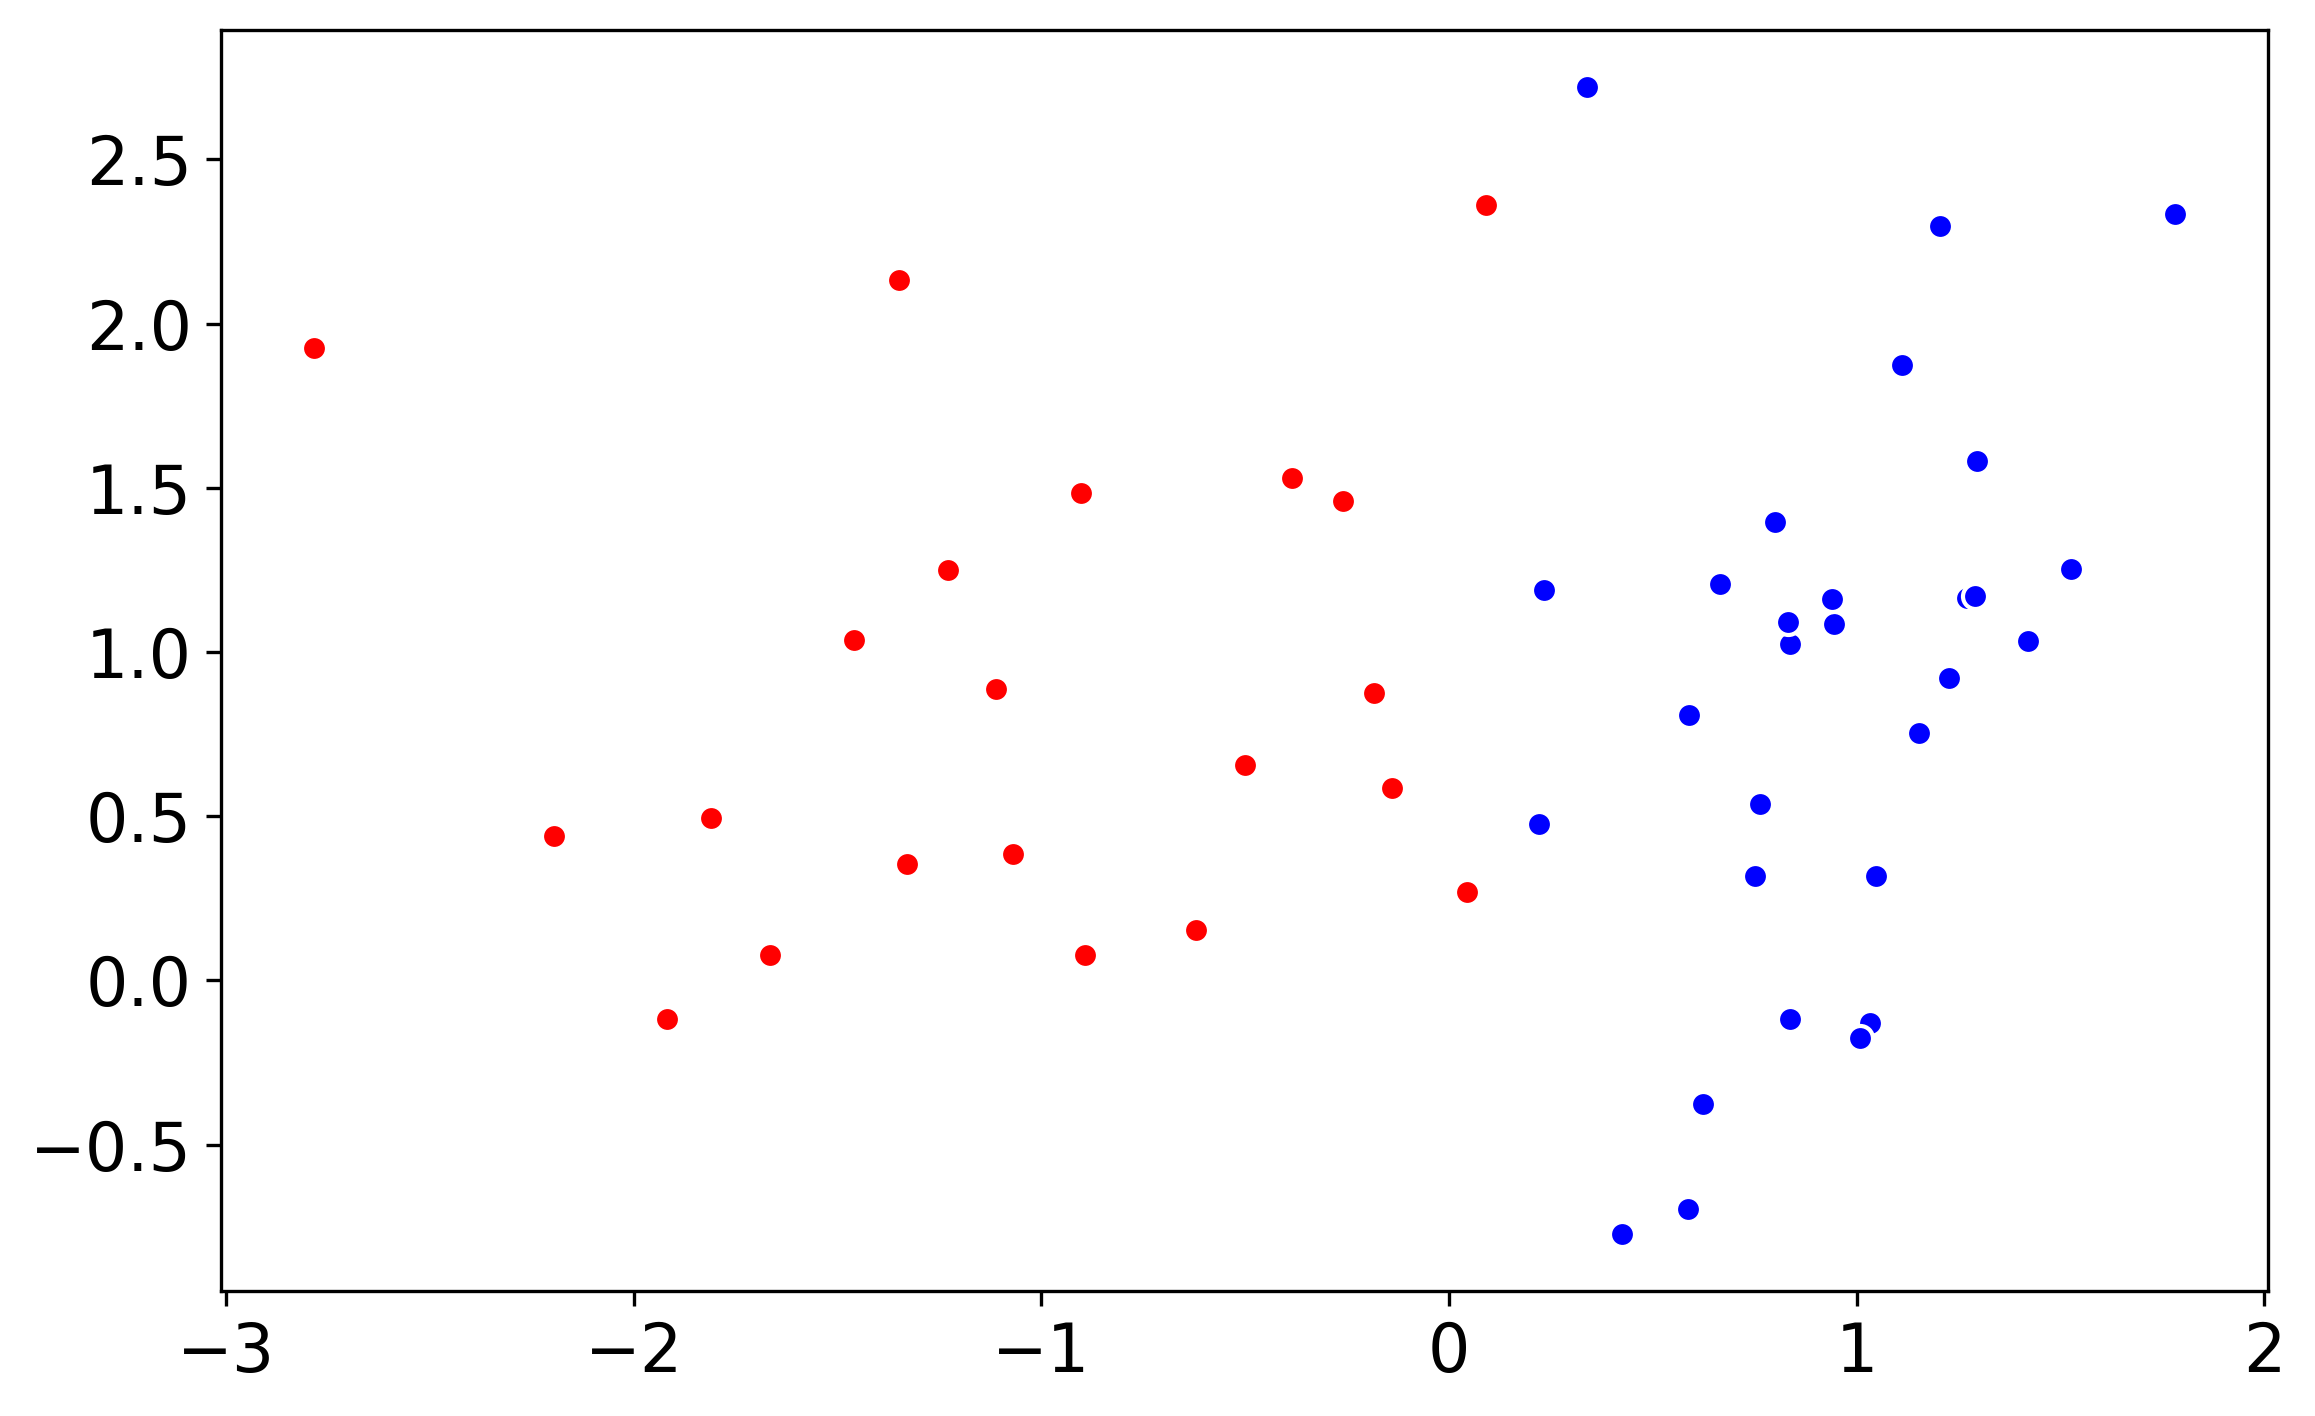

In [ ]:
import matplotlib

matplotlib.rcParams.update({"font.size": 16})
plt.figure(figsize=(8, 5), dpi=300)
plt.scatter(reds.T[0], reds.T[1], c="r", ec="w")
plt.scatter(blues.T[0], blues.T[1], c="b", ec="w")
plt.tight_layout()
plt.savefig("/home/federico/tesi/immagini/points.svg")
plt.show()